Useful links
- [Comparing random forests and the multi-output meta estimator](http://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html#sphx-glr-auto-examples-ensemble-plot-random-forest-regression-multioutput-py)
- [sklearn.ensemble.RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [classifier comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


# Random Forest Regressor application on noisy OES spectra


In [1]:
# Author: Rinat R. Ismagilov <ismagil@polly.phys.msu.ru>
#
# License: GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time 
%matplotlib inline

pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format


In [2]:
# nice practice

%load_ext version_information

%version_information numpy, pandas, matplotlib, sklearn, version_information


Software versions
Python 3.5.2 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.17134 SP0
numpy 1.15.2
pandas 0.23.4
matplotlib 1.5.3
sklearn 0.20.0
version_information 1.0.3
Tue Oct 30 19:05:38 2018 Russia TZ 2 Standard Time

## Macro-tuning parameters
Including some estimator's parameters, path of spectra file location

In [3]:
# estimator param
max_depth = 50 # default None (first good run - I set to 30)
my_estimators = 50 # default 10

# savefile path (bound to current time - good for several runs)
my_file = "forest40chMOSTandNoise3add_estim" + str(my_estimators) + "_dep" + str(max_depth) + "T{:0.0f}".format(time.time())

# I run program at home and at the university
MSU_PC = False
if MSU_PC: 
    diskG = "D:/ZverG/"
else:
    diskG = "G:/"

  

## Read synthetic spectra (dataset)

In [4]:
oes_clean = pd.read_pickle(diskG + "SWAN BAND big data/pickels/40channels.pkl")
oes_clean
# first (0) row is the wavelength in A
# there are 40 channels/features-columns (from 0 to 39 = 40ch) corresponding to particular wavelength
# there are two label-columns = see last 2 columns (Trot and Tvib, in K). Trot step is 1K, Tvib step is 50K

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Trot,Tvib
0,5052.734694,5056.081633,5059.428571,5062.775510,5066.122449,5069.469388,5072.816327,5076.163265,5079.510204,5082.857143,...,5159.836735,5163.183673,5166.530612,5169.877551,5173.224490,5176.571429,5179.918367,5183.265306,0.0,0.0
1,0.004008,0.005097,0.006500,0.008181,0.009786,0.011738,0.014141,0.016841,0.019812,0.023979,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2000.0
2,0.004292,0.005448,0.006931,0.008705,0.010375,0.012399,0.014890,0.017679,0.020734,0.025034,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2050.0
3,0.004584,0.005806,0.007372,0.009239,0.010975,0.013068,0.015647,0.018522,0.021659,0.026090,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2100.0
4,0.004882,0.006173,0.007821,0.009782,0.011582,0.013745,0.016408,0.019368,0.022586,0.027147,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115517,0.393222,0.407718,0.422144,0.436728,0.451085,0.463904,0.477839,0.492435,0.508277,0.524575,...,0.880101,0.962491,1.000000,0.983233,0.863920,0.592608,0.361326,0.171891,6000.0,2800.0
115518,0.395455,0.410052,0.424567,0.439231,0.453657,0.466478,0.480413,0.495038,0.510921,0.527278,...,0.880101,0.962497,1.000000,0.983233,0.863920,0.592608,0.361326,0.171891,6000.0,2850.0
115519,0.397656,0.412354,0.426961,0.441704,0.456190,0.469020,0.482964,0.497599,0.513522,0.529930,...,0.880101,0.962497,1.000000,0.983233,0.863920,0.592608,0.361326,0.171891,6000.0,2900.0
115520,0.399831,0.414637,0.429334,0.444156,0.458692,0.471522,0.485477,0.500140,0.516091,0.532548,...,0.880101,0.962497,1.000000,0.983233,0.863920,0.592608,0.361326,0.171891,6000.0,2950.0


In [5]:
oes_noisy3add = pd.read_pickle(diskG + "SWAN BAND big data/pickels/40chan_noisy3add_norm.pkl")
oes_noisy3add # see wavelength in tail;
#for each clean spectrum we created 10 3%-noisy spectra = totally > 1mln

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Trot,Tvib
0,0.004073,0.005180,0.006606,0.008073,0.009945,0.011582,0.014371,0.016119,0.020135,0.022951,...,0.840038,0.933814,0.986717,1.000000,0.681751,0.449339,0.237199,0.055656,500.0,2000.0
1,0.004362,0.005537,0.007044,0.008589,0.010545,0.012234,0.015133,0.016921,0.021073,0.023961,...,0.840038,0.933814,0.986717,1.000000,0.681751,0.449339,0.237199,0.055656,500.0,2050.0
2,0.004658,0.005901,0.007492,0.009116,0.011154,0.012894,0.015902,0.017728,0.022012,0.024971,...,0.840038,0.933814,0.986717,1.000000,0.681751,0.449339,0.237199,0.055656,500.0,2100.0
3,0.004961,0.006273,0.007949,0.009652,0.011771,0.013563,0.016676,0.018537,0.022954,0.025983,...,0.840038,0.933814,0.986717,1.000000,0.681751,0.449339,0.237199,0.055656,500.0,2150.0
4,0.005271,0.006653,0.008413,0.010196,0.012395,0.014236,0.017456,0.019350,0.023897,0.026995,...,0.840038,0.933814,0.986717,1.000000,0.681751,0.449339,0.237199,0.055656,500.0,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155206,0.419916,0.422734,0.424567,0.466400,0.453657,0.480905,0.495271,0.510348,0.526722,0.559893,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2850.0
1155207,0.422254,0.425107,0.426961,0.469025,0.456190,0.483526,0.497901,0.512988,0.529404,0.562709,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2900.0
1155208,0.424563,0.427461,0.429334,0.471630,0.458692,0.486105,0.500491,0.515608,0.532052,0.565489,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2950.0
1155209,0.426847,0.429784,0.431676,0.474202,0.461174,0.488665,0.503051,0.518180,0.534665,0.568224,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,3000.0


In [7]:
# let's merge clean and noisy (and remove extra row with wavelength)
oes_with_lambda = oes_clean.append(oes_noisy3add.iloc[:-1,:], ignore_index=True)
oes_with_lambda

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Trot,Tvib
0,5052.734694,5056.081633,5059.428571,5062.775510,5066.122449,5069.469388,5072.816327,5076.163265,5079.510204,5082.857143,...,5159.836735,5163.183673,5166.530612,5169.877551,5173.224490,5176.571429,5179.918367,5183.265306,0.0,0.0
1,0.004008,0.005097,0.006500,0.008181,0.009786,0.011738,0.014141,0.016841,0.019812,0.023979,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2000.0
2,0.004292,0.005448,0.006931,0.008705,0.010375,0.012399,0.014890,0.017679,0.020734,0.025034,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2050.0
3,0.004584,0.005806,0.007372,0.009239,0.010975,0.013068,0.015647,0.018522,0.021659,0.026090,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2100.0
4,0.004882,0.006173,0.007821,0.009782,0.011582,0.013745,0.016408,0.019368,0.022586,0.027147,...,0.826550,0.918821,1.000000,0.983944,0.712298,0.469472,0.247827,0.054762,500.0,2150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270727,0.417545,0.420328,0.422144,0.463743,0.451085,0.478252,0.492617,0.507665,0.523997,0.557023,...,0.907321,0.992259,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2800.0
1270728,0.419916,0.422734,0.424567,0.466400,0.453657,0.480905,0.495271,0.510348,0.526722,0.559893,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2850.0
1270729,0.422254,0.425107,0.426961,0.469025,0.456190,0.483526,0.497901,0.512988,0.529404,0.562709,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2900.0
1270730,0.424563,0.427461,0.429334,0.471630,0.458692,0.486105,0.500491,0.515608,0.532052,0.565489,...,0.907321,0.992265,1.000000,0.983233,0.917358,0.629264,0.372501,0.182523,6000.0,2950.0


## Train-test data splitting

In [8]:
oes = oes_with_lambda.iloc[1:].copy()
oes.columns = np.append(oes_with_lambda.iloc[0,:40].values, ['Trot','Tvib'])
# X - stands for reatures, y - for labels
X, y = oes.iloc[:,:40].values, oes[['Trot','Tvib']].values


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.2,
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train))


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(254146, 40) (1016585, 40) (254146, 2) (1016585, 2)
<class 'numpy.ndarray'>


## Setup RandomForestRegressor and train it on (X_train, y_train) data

In [9]:
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2, n_estimators = my_estimators)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

## Predict new y_rf by trained regressor on new, unseen X_test data

In [10]:
y_rf = regr_rf.predict(X_test)

## Score

In [11]:
s = 50 # marker_size
a = 0.4 # alpha
print("RF score=%.10f" % regr_rf.score(X_test, y_test))

RF score=0.9999773857


## Trot analysis

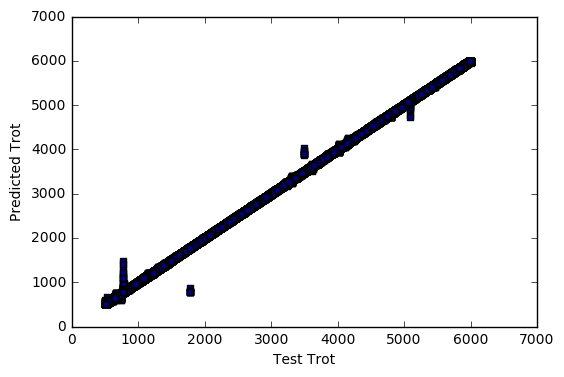

In [12]:
fig = plt.figure()
plt.scatter(y_test[:, 0], y_rf[:, 0], edgecolor='k', c="navy", marker="s", label="Test data")
plt.xlabel( "Test Trot" )
plt.ylabel( "Predicted Trot" )


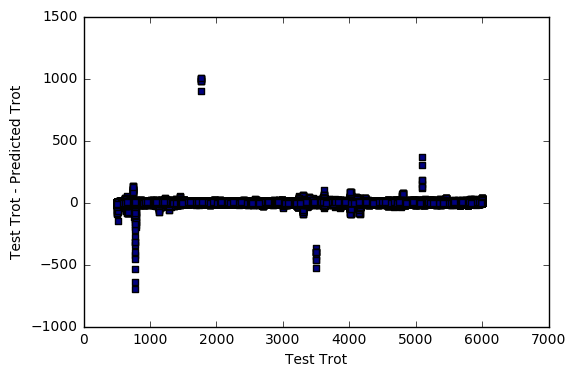

In [13]:
fig = plt.figure()
plt.scatter(y_test[:, 0], y_test[:, 0] - y_rf[:, 0], edgecolor='k',
            c="navy", marker="s", label="Test data")
plt.xlabel( "Test Trot" )
plt.ylabel( "Test Trot - Predicted Trot")

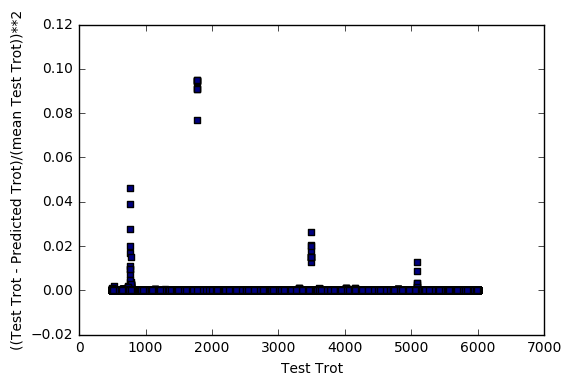

In [14]:
fig = plt.figure()
plt.scatter(y_test[:, 0], np.power((y_test[:, 0] - y_rf[:, 0])/np.mean(y_test[:, 0]),2), edgecolor='k',
            c="navy", marker="s", label="Test data")
plt.xlabel( "Test Trot" )
plt.ylabel( "((Test Trot - Predicted Trot)/(mean Test Trot))**2")

# Tvib analysis

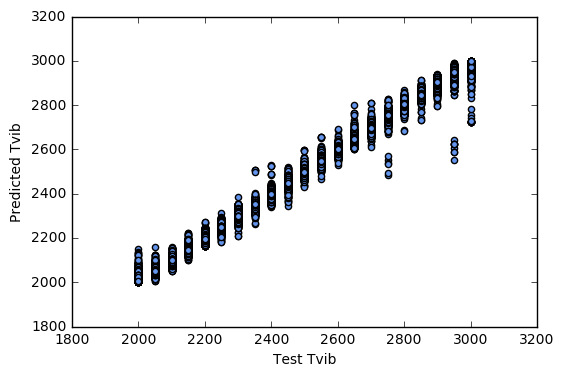

In [15]:
fig = plt.figure()
plt.scatter(y_test[:, 1], y_rf[:, 1], edgecolor='k',
            c="cornflowerblue",
            label="Tvib data")
plt.xlabel( "Test Tvib" )
plt.ylabel( "Predicted Tvib" )


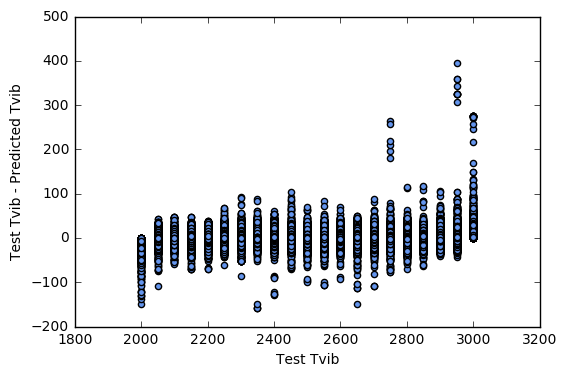

In [16]:
fig = plt.figure()
plt.scatter(y_test[:, 1], y_test[:, 1] - y_rf[:, 1], edgecolor='k',
            c="cornflowerblue",
            label="Tvib data")
plt.xlabel( "Test Tvib" )
plt.ylabel( "Test Tvib - Predicted Tvib" )


## Let's predict from experimental spectrum

In [17]:
exp_oes = pd.read_pickle(diskG + "SWAN BAND big data/pickels/exp_copy_45channels.pkl")
exp_oes
# the same spectrum on each row (started working on future mapping project)

,5,6,7,8,9,10,11,12,13,14,...,42,43,44,45,46,47,48,49,50,51
0,5052.734694,5056.081633,5059.428571,5062.77551,5066.122449,5069.469388,5072.816327,5076.163265,5079.510204,5082.857143,...,5176.571429,5179.918367,5183.265306,5186.612245,5189.959184,5193.306122,5196.653061,5200.000000,0.0,0.0
1,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,0.0,0.0
2,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,0.0,1.0
3,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,0.0,2.0
4,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,50.0,36.0
2088,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,50.0,37.0
2089,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,50.0,38.0
2090,0.053100,0.082447,0.112296,0.14080,0.166748,0.189187,0.207544,0.228351,0.266622,0.323093,...,0.434360,0.235678,0.113150,0.038370,0.000011,0.000000,0.012209,0.033371,50.0,39.0


In [18]:
exp_oes_sample = exp_oes.iloc[1:3,0:40].values # limit ourselves by 2 rows
exp_oes_sample = np.array(exp_oes_sample, np.newaxis)
exp_oes_sample

array([[0.0531004 , 0.08244674, 0.11229577, 0.14080037, 0.16674807,
        0.18918664, 0.20754432, 0.22835066, 0.26662239, 0.32309312,
        0.36380907, 0.3603839 , 0.33512525, 0.32287443, 0.32980457,
        0.3449063 , 0.3604383 , 0.37269345, 0.38115266, 0.3918435 ,
        0.41109432, 0.44262324, 0.48768644, 0.53058326, 0.54685043,
        0.53560701, 0.52156703, 0.5209534 , 0.52968215, 0.54536468,
        0.58346196, 0.66176803, 0.77628293, 0.90948732, 1.        ,
        0.94231483, 0.70983071, 0.4343601 , 0.23567796, 0.11314994],
       [0.0531004 , 0.08244674, 0.11229577, 0.14080037, 0.16674807,
        0.18918664, 0.20754432, 0.22835066, 0.26662239, 0.32309312,
        0.36380907, 0.3603839 , 0.33512525, 0.32287443, 0.32980457,
        0.3449063 , 0.3604383 , 0.37269345, 0.38115266, 0.3918435 ,
        0.41109432, 0.44262324, 0.48768644, 0.53058326, 0.54685043,
        0.53560701, 0.52156703, 0.5209534 , 0.52968215, 0.54536468,
        0.58346196, 0.66176803, 0.77628293, 0.9

In [19]:
y_rf_exp = regr_rf.predict(exp_oes_sample)
y_rf_exp

array([[1453.06, 2567.  ],
       [1453.06, 2567.  ]])

## Let's plot

In [20]:
# Lets fetch corresponding theoretical spectra without noise
theor_samples = pd.read_pickle(diskG + "SWAN BAND big data/pickels/40channels.pkl")
conditions_rf = (theor_samples["Trot"] == int(np.around(y_rf_exp[0,0])))&(theor_samples["Tvib"] == int(np.around(y_rf_exp[0,1]/50)*50))

# Trot step is 1K, Tvib step is 50K
theor_sample_rf = theor_samples[conditions_rf]
theor_sample_rf


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Trot,Tvib
20025,0.052233,0.059259,0.067187,0.075358,0.08317,0.091794,0.101458,0.112511,0.124762,0.13988,...,0.818075,0.92987,1.0,0.950888,0.677812,0.432296,0.215831,0.043904,1453.0,2550.0


In [21]:
# try closest spectrum that I found by hand in 30-50 min
by_hand = theor_samples[(theor_samples["Trot"] == 1500)&(theor_samples["Tvib"] == 3000)]
by_hand

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Trot,Tvib
21021,0.063474,0.071762,0.080891,0.090175,0.098579,0.107647,0.117971,0.129754,0.142851,0.159578,...,0.822712,0.932628,1.0,0.948083,0.676102,0.431196,0.215612,0.044654,1500.0,3000.0


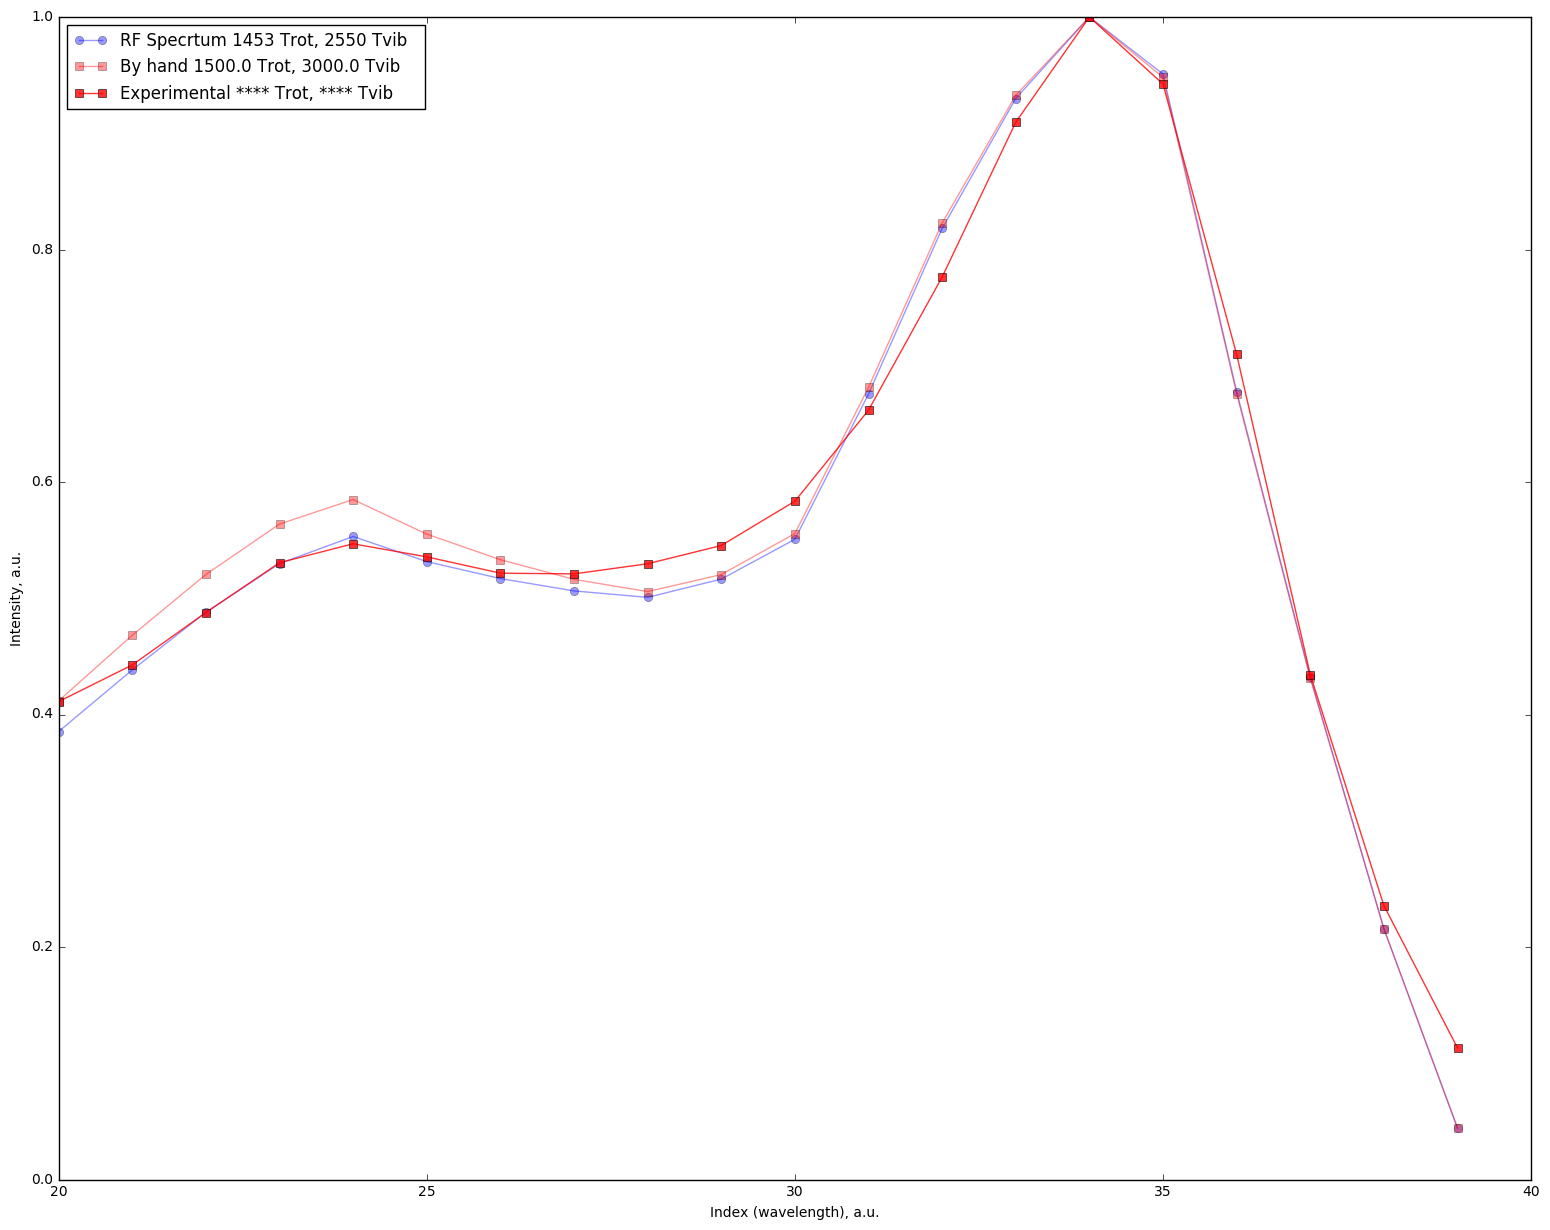

In [25]:
# ax = plt.gca()
plt.figure(figsize=(19,15))
plt.plot(np.arange(40), theor_sample_rf.iloc[0,:40].values, '-o',
           c ='b', alpha=0.4, label="RF Specrtum {} Trot, {} Tvib  ".format(int(np.around(y_rf_exp[0,0])), int(np.around(y_rf_exp[0,1]/50)*50)))
plt.plot(np.arange(40), by_hand.iloc[0,:40].values, '-s',
           c ='r', alpha=0.4, label="By hand {} Trot, {} Tvib  ".format(1500.0, 3000.0))
plt.plot(np.arange(40), exp_oes_sample[1], '-s',
           c ='r', alpha=0.8, label="Experimental {} Trot, {} Tvib  ".format("****", "****"))
plt.xlim(20,40)
plt.ylabel( "Intensity, a.u." )
plt.xlabel( "Index (wavelength), a.u.")
plt.legend(loc = "best")

## Save model

In [26]:
# my_file  at the top
# https://stackoverflow.com/questions/20662023/save-python-random-forest-model-to-file
import _pickle
my_rf_path = diskG + "SWAN BAND big data/random_forest_models/"
with open(my_rf_path+my_file, 'wb') as f:
    _pickle.dump(regr_rf, f)

## Load model and test (the @anchor for future work)


In [27]:
with open(my_rf_path+my_file, 'rb') as f:
    rf = _pickle.load(f)

print(rf.predict(exp_oes_sample))


[[1453.06 2567.  ]
 [1453.06 2567.  ]]


## Which channel give max contribution?!

In [28]:
importances = pd.DataFrame(list(zip(np.arange(40), rf.feature_importances_)))
importances.columns = ['feature name/channel', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name/channel,importance
0,0,0.927391
23,23,0.018356
7,7,0.006682
39,39,0.005889
8,8,0.005600
...,...,...
20,20,0.000049
15,15,0.000044
14,14,0.000037
17,17,0.000036


In [ ]:
# my_iteration_log
# # d50est50
# RF score=0.9999773857

# # d30est10 (my_default)
# RF score=0.999962

# # d30est40
# RF score=0.9999764

# # d30est100 - завис
# # d40est10 - нет улучшения (похоже d выходит на насыщение)